## 1 - Importações de Blibiotecas

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## 2 - Configurações de Exibição

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)


## 3 - Importação da base

In [7]:
# Caminho
caminho = "C:/Users/paulo/OneDrive/Área de Trabalho/APS_4sem/data/desmatamento.csv"

# Leitura
df = pd.read_csv(caminho)

# Visualizar primeiras linhas
df.head()

,year,month,area,uf,className,numPol
0,2019/2020,8,5.20,PA,MINERACAO,58
1,2015/2016,8,1.96,AM,MINERACAO,15
2,2015/2016,8,0.20,MT,MINERACAO,2
3,2015/2016,8,11.86,PA,MINERACAO,101
4,2015/2016,8,0.11,RO,MINERACAO,1


## 4 - Verificação de Estrutura e Qualidade dos Dados

In [8]:
df.info()
df.describe()
df.isna().sum()

# Identificação de colunas erradas, valores ausentes ou inconsistentes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1923 entries, 0 to 1922
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1923 non-null   object 
 1   month      1923 non-null   int64  
 2   area       1923 non-null   float64
 3   uf         1923 non-null   object 
 4   className  1923 non-null   object 
 5   numPol     1923 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 90.3+ KB


year         0
month        0
area         0
uf           0
className    0
numPol       0
dtype: int64

## 5 - Padronizações e Correções

In [9]:
df.columns = df.columns.str.lower().str.strip()

# Corrigir tipo da coluna 'year' (ex: "2019/2020" -> 2019)
df['year'] = df['year'].astype(str).str.split('/').str[0].astype(int)

# Corrigir os demais tipos
df['month'] = df['month'].astype(int)
df['area'] = df['area'].astype(float)
df['numpol'] = df['numpol'].astype(int)
df['classname'] = df['classname'].astype('category')
df['uf'] = df['uf'].str.strip().str.upper()


## 6 - Filtro de Estados para a APS

In [10]:
# Amazônia e Cerrado Central
amazonia = ['AM', 'PA', 'AC', 'MT']
cerrado_central = ['GO', 'MG']

df = df[df['uf'].isin(amazonia + cerrado_central)]


## 7 - Tratamentos

In [ ]:
# Remover áreas negativas
df = df[df['area'] >= 0]

# Remover outliers (Z-score > 3)
df = df[(abs(stats.zscore(df['area'])) < 3)]

In [12]:
#Remover duplicatas
df = df.drop_duplicates()

## 8 - Estatísticas por Estado e Ano

,year,uf,area
0,2015,AC,143.76
1,2015,AM,927.96
2,2015,MT,1285.19
3,2015,PA,1700.83
4,2016,AC,158.79


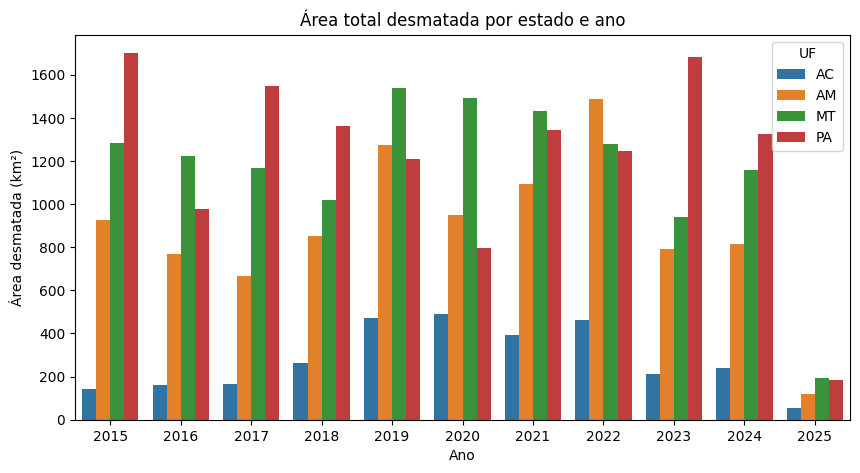

✅ Base tratada salva com sucesso em data/base/desmatamento_tratado.csv


In [13]:
resumo = df.groupby(['year', 'uf'])['area'].sum().reset_index()
display(resumo.head())

# Gráfico rápido (teste visual)
plt.figure(figsize=(10,5))
sns.barplot(data=resumo, x='year', y='area', hue='uf')
plt.title('Área total desmatada por estado e ano')
plt.xlabel('Ano')
plt.ylabel('Área desmatada (km²)')
plt.legend(title='UF')
plt.show()

#Exportar base tratada
df.to_csv("C:/Users/paulo/OneDrive/Área de Trabalho/APS_4sem/data/desmatamento_tratado.csv", index=False)
print("✅ Base tratada salva com sucesso em data/base/desmatamento_tratado.csv")